# Homework 3: (DUE 2/17)

Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1) Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~$dx^n$; what is n? what is the optimal value for dx.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)





For number 1, first I will write a program to calculate the derivative of f(x)=cosx using the forward difference scheme.

In [1]:
import numpy as np

"""
Defining forward difference and central difference derivative schemes.
"""

def derifw(f,x,dx):
    return (f(x+dx)-f(x))/dx

def dericd(f,x,dx):
    return (f(x+dx/2)-f(x-dx/2))/dx

x = np.pi/4.
dx_arr = []
y_arr = []


"""
Populating step size (dx_arr) and derivative value (y_arr) arrays for
gradually increasing values of dx.
"""
for dx in 10**np.arange(-16., -.1, 1):
    y = derifw(np.cos, x, dx)
    dx_arr.append(dx)
    y_arr.append(y)
    print('dx: %0.2g,    y: %g' %(dx, y))
    

dx: 1e-16,    y: -1.11022
dx: 1e-15,    y: -0.777156
dx: 1e-14,    y: -0.710543
dx: 1e-13,    y: -0.707212
dx: 1e-12,    y: -0.707101
dx: 1e-11,    y: -0.707112
dx: 1e-10,    y: -0.707107
dx: 1e-09,    y: -0.707107
dx: 1e-08,    y: -0.707107
dx: 1e-07,    y: -0.707107
dx: 1e-06,    y: -0.707107
dx: 1e-05,    y: -0.70711
dx: 0.0001,    y: -0.707142
dx: 0.001,    y: -0.70746
dx: 0.01,    y: -0.710631
dx: 0.1,    y: -0.741255


In [2]:
import matplotlib.pyplot as plt

"""
Forward difference absolute error plot.
"""
plt.plot(dx_arr, abs(y_arr+np.sin(np.pi/4.)), 'b-', lw=2)     
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Absolute Error')
plt.title('Absolute error versus dx (forward difference)')
plt.show()

<Figure size 640x480 with 1 Axes>

From the above graph, we can see that for small step size $d_x$, the approximation error $\epsilon_{app}$ decreases almost linearly as step size is increased. However, round-off error $\epsilon_{ro}$ will increase if you continue decreasing $d_x$ lower than certain value (~$10^{-8}$). Therefore, at very small step-sizes, the round-off error $\epsilon_{ro}$ contribution will dominate over approximation error $\epsilon_{app}$. 

As we have learned, we minimize the total error when 

$$\epsilon_{app} = \epsilon_{ro}$$.

If we decrease the step size $d_x$ and follow the round-off error to the minimum on the graph, then we see that the round-off error limit is 

$$\epsilon_{ro} = \frac{\epsilon_m}{d_x}$$


The graph is consistent, then, with optimal step size 

$$d_x = \frac{\epsilon_m}{\epsilon_{ro}} \approx \frac{10^{-16}}{10^-8} \approx 10^{-8}$$

It follows that at this minimum, 

$$\epsilon_{app} = \epsilon_{ro}$$

Finally, *n* is on the same order of magnitude as the absolute error, provided you decrease the $d_x$ following the round-off error to the minimum.

In [3]:
x = np.pi/4.
dx_arr_2 = []
y_arr_2 = []

"""
Populating step size (dx_arr_2) and derivative value (y_arr_2) arrays for
gradually increasing values of dx for central difference scheme.
"""
for dx in 10**np.arange(-16., -.1, 1):
    y = dericd(np.cos, x, dx)
    dx_arr_2.append(dx)
    y_arr_2.append(y)
    print('dx: %0.2g,    y: %g' %(dx, y))

dx: 1e-16,    y: 0
dx: 1e-15,    y: -0.777156
dx: 1e-14,    y: -0.710543
dx: 1e-13,    y: -0.707212
dx: 1e-12,    y: -0.707212
dx: 1e-11,    y: -0.707101
dx: 1e-10,    y: -0.707107
dx: 1e-09,    y: -0.707107
dx: 1e-08,    y: -0.707107
dx: 1e-07,    y: -0.707107
dx: 1e-06,    y: -0.707107
dx: 1e-05,    y: -0.707107
dx: 0.0001,    y: -0.707107
dx: 0.001,    y: -0.707107
dx: 0.01,    y: -0.707104
dx: 0.1,    y: -0.706812


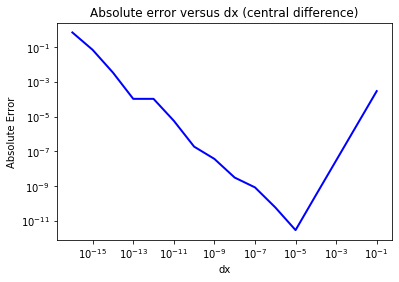

In [4]:
"""
Central difference absolute error plot.
"""

plt.plot(dx_arr_2, abs(y_arr_2+np.sin(np.pi/4.)), 'b-', lw=2)     
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Absolute Error')
plt.title('Absolute error versus dx (central difference)')
plt.show()

For the central difference scheme, the error calculations are able to use higher order (third order) terms in the taylor expansion. Thus, we are able to use larger step sizes $d_x$ and obtain much lower (~1000x) absolute error when the round-off error $\epsilon_{ro}$ equals the approximation error $\epsilon{app}$.

Optimum step size as shown by the graph is $d_x \approx 10^{-5}$, which provides an absolute error of $\epsilon \approx 10^{-11}$

In [5]:
x = 0.
dx_arr_3 = []
y_arr_3 = []

for dx in 10**np.arange(-16., -.1, 1):
    y = dericd(np.cos, x, dx)
    dx_arr_3.append(dx)
    y_arr_3.append(y)
    print('dx: %0.2g,    y: %g' %(dx, y))

dx: 1e-16,    y: 0
dx: 1e-15,    y: 0
dx: 1e-14,    y: 0
dx: 1e-13,    y: 0
dx: 1e-12,    y: 0
dx: 1e-11,    y: 0
dx: 1e-10,    y: 0
dx: 1e-09,    y: 0
dx: 1e-08,    y: 0
dx: 1e-07,    y: 0
dx: 1e-06,    y: 0
dx: 1e-05,    y: 0
dx: 0.0001,    y: 0
dx: 0.001,    y: 0
dx: 0.01,    y: 0
dx: 0.1,    y: 0


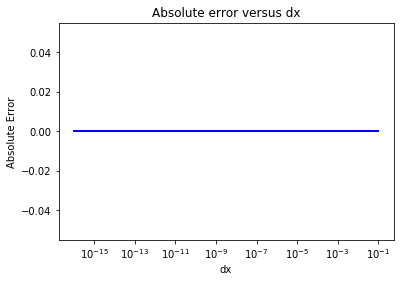

In [6]:
plt.plot(dx_arr_3, abs(y_arr_3+np.sin(0)), 'b-', lw=2)     
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Absolute Error')
#plt.yscale('log')
plt.xscale('log')
plt.title('Absolute error versus dx')
plt.show()

To evaluate why this absolute error is equal to zero for all step sizes, I write the taylor expansion for the central difference scheme below.

The central difference derivative is defined by

$$\frac{dy}{dt} = \frac{y(t+h/2)-y(t-h/2)}{h}$$

Writing out the taylor expansion on the two terms in the numerator, we get

$$y(t+h/2) \approx y(t) + \frac{h}{2}y^{'}(t) + \frac{(h/2)^2}{2!}y^{''}(t) + \frac{(h/2)^3}{3!}y^{'''}(t)  + ... + $$

$$y(t-h/2) \approx y(t) - \frac{h}{2}y^{'}(t) + \frac{(h/2)^2}{2!}y^{''}(t) - \frac{(h/2)^3}{3!}y^{'''}(t)  + ... + $$

Combining terms and rewriting,

$$\frac{dy}{dt} = y{'}(t) + \frac{h^2)}{4*3!}y{'''}(t) +...$$

if $y = cos(x)$, and x=0, then

$$\frac{dcos(x)}{dx} = y{'}(x) + \frac{h^2)}{4*3!}y{'''}(x) +...$$

$$\frac{dcos(x)}{dx} = sin(x) + \frac{h^2)}{4*3!}sin(x) +...$$

Therefore,

$$\frac{dcos(x)}{dx} = 0 $$

for all values of the stepsize *h* because $sin(0) = 0$